Let's start

In [1]:
# import libraries

import numpy as np 
import pandas as pd
import sklearn as sk
from  matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
path=r'E:\mphti\training\pl_gr' # way to data
train=r'\train.csv' # train file
test=r'\test.csv' # test file
origin_data=r'\Churn_Modelling.csv'

In [3]:
train_dataset= pd.read_csv(path+train)
test_dataset=pd.read_csv(path+test)
origin_dataset=pd.read_csv(path+origin_data)

In [4]:
train_dataset.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
origin_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


that's okey

In [6]:
test_dataset.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


compare datasets

In [7]:
# let compare columns in origib and train datasets
tr_col=train_dataset.columns.to_list()
orig_col=origin_dataset.columns.to_list()
# search differnt columns in list
diff_col=[i for i,j in zip(tr_col,orig_col) if i!=j]
print (diff_col)

['id']


columns 'Id' not match with origin datasets. As you can see, row_number displays the index of the element. it does not carry useful information for training, like the 'id' column

In [8]:
# drop it
train_dataset.drop(columns='id',axis=1,inplace=True)
origin_dataset.drop(columns='RowNumber',axis=1,inplace=True)
# also drop on test data
test_id=test_dataset['id'].to_list()
test_dataset.drop(columns='id',axis=1,inplace=True)

there are no more different columns so you can combine

In [9]:
train_df=pd.concat([train_dataset,origin_dataset])

let's define the dimensions train and test datasets

In [10]:
print ('train dataset size is '+f'{train_df.shape}')
print ('test dataset size is '+f'{test_dataset.shape}')

train dataset size is (175036, 13)
test dataset size is (110023, 12)


In [11]:
# drop N/A information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175036 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       175036 non-null  int64  
 1   Surname          175036 non-null  object 
 2   CreditScore      175036 non-null  int64  
 3   Geography        175035 non-null  object 
 4   Gender           175036 non-null  object 
 5   Age              175035 non-null  float64
 6   Tenure           175036 non-null  int64  
 7   Balance          175036 non-null  float64
 8   NumOfProducts    175036 non-null  int64  
 9   HasCrCard        175035 non-null  float64
 10  IsActiveMember   175035 non-null  float64
 11  EstimatedSalary  175036 non-null  float64
 12  Exited           175036 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 18.7+ MB


In [12]:
print('TRAIN data\n')
print(f'{train_df.isna().sum()}\n\n')

print('TEST data\n')
print(test_dataset.isna().sum())

TRAIN data

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


TEST data

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [13]:
train_df.dropna(inplace=True)
test_dataset.dropna(inplace=True)

let's evaluate the statistics with a quick glance

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,175032.0,1.569194e+07,71428.198859,15565701.00,15632882.00,15690169.00,15756655.00,15815690.00
CreditScore,175032.0,6.561159e+02,81.149591,350.00,597.00,659.00,710.00,850.00
Age,175032.0,3.817126e+01,8.969537,18.00,32.00,37.00,42.00,92.00
Tenure,175032.0,5.019933e+00,2.811133,0.00,3.00,5.00,7.00,10.00
Balance,175032.0,5.667782e+04,62982.219148,0.00,0.00,0.00,120727.97,250898.09
NumOfProducts,175032.0,1.553070e+00,0.549211,1.00,1.00,2.00,2.00,4.00
HasCrCard,175032.0,7.511884e-01,0.432326,0.00,1.00,1.00,1.00,1.00
IsActiveMember,175032.0,4.987431e-01,0.500000,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,175032.0,1.118622e+05,50815.188500,11.58,73214.33,116969.73,154767.34,199992.48
Exited,175032.0,2.111557e-01,0.408130,0.00,0.00,0.00,0.00,1.00


drop duplicate

In [15]:
train_duplicates_number = train_df[train_df.duplicated()]
test_duplicates_number = test_dataset[test_dataset.duplicated()]
                             
print(len(train_duplicates_number))
print(len(test_duplicates_number))

2
0


let's define numerical and categorical features. visualize them

In [16]:
sel_cols = list(train_df.select_dtypes(include='object'))

In [17]:
# I assume b that the last name column will give us little and it can be excluded from 
# categorical features and from the training dataset as a whole
train_df=train_df.drop(columns=['Surname','CustomerId'])
test_dataset=test_dataset.drop(columns=['Surname','CustomerId'])
# categorical columsn
cat_col=list(train_df.select_dtypes(include='object'))
# numeric
num_col=list(train_df.select_dtypes(include=['int64','float64']))

In [18]:
def pie_plot(data,cat_col):
    n=1
    for i in cat_col:
        dict=data[i].value_counts().to_dict()
        labels=list(dict.keys())
        value=list(dict.values())

        fig, ax = plt.subplots()
        plt.pie(value,labels=labels,autopct=lambda p: '{:.0f}%'.format(p),startangle=90)
        plt.show()


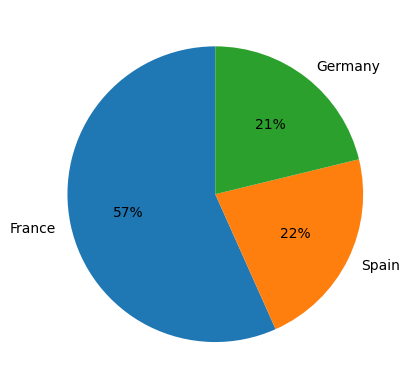

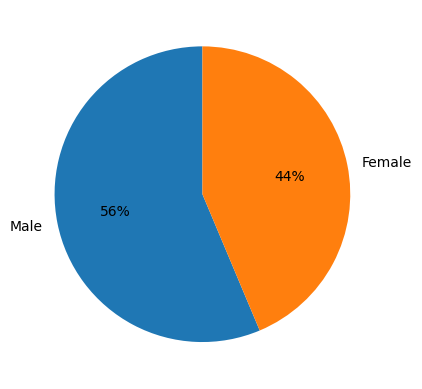

In [19]:
pie_plot(train_df,cat_col)

Distribution of features with Target

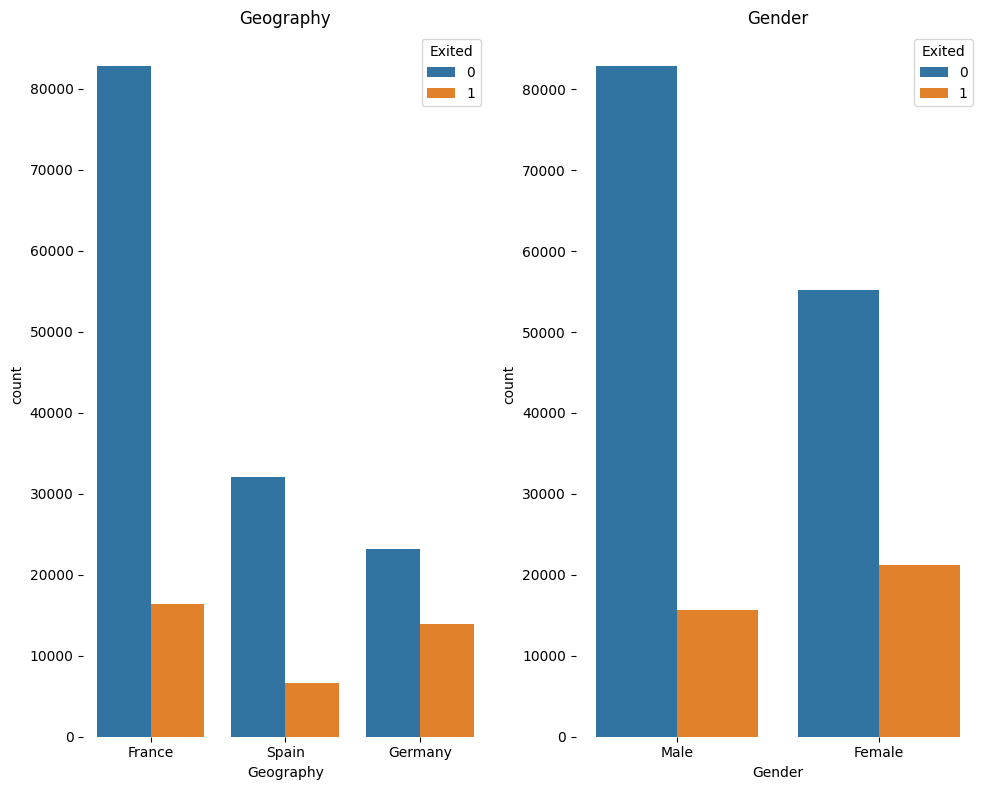

In [20]:
fig ,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8))

for i,lab in enumerate(cat_col):
    ax=sns.countplot(x=lab,hue='Exited',data=train_df,ax=axes[i])
    axes[i].set_title( f'{lab}')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()  

*  Let's analyze the geographical data: most of the bank's users are from France and their number far exceeds users from other countries.  It is worth noting that the vast majority of people no longer use their bank accounts, this ratio for some countries is 8 or 6 times higher than active customers
*  Let's analyze the data by gender: men prevail, but if we take active customers, then women are more related to men.

notice please

In [21]:
train_df['Exited'].value_counts()

0    138073
1     36959
Name: Exited, dtype: int64

Kdeplot is a kernel distribution estimation graph that displays a probability density function of continuous or nonparametric data variables.  
since there are 3.7 times fewer active users, the distribution density of active customers will be very different from the distribution density of passive customers

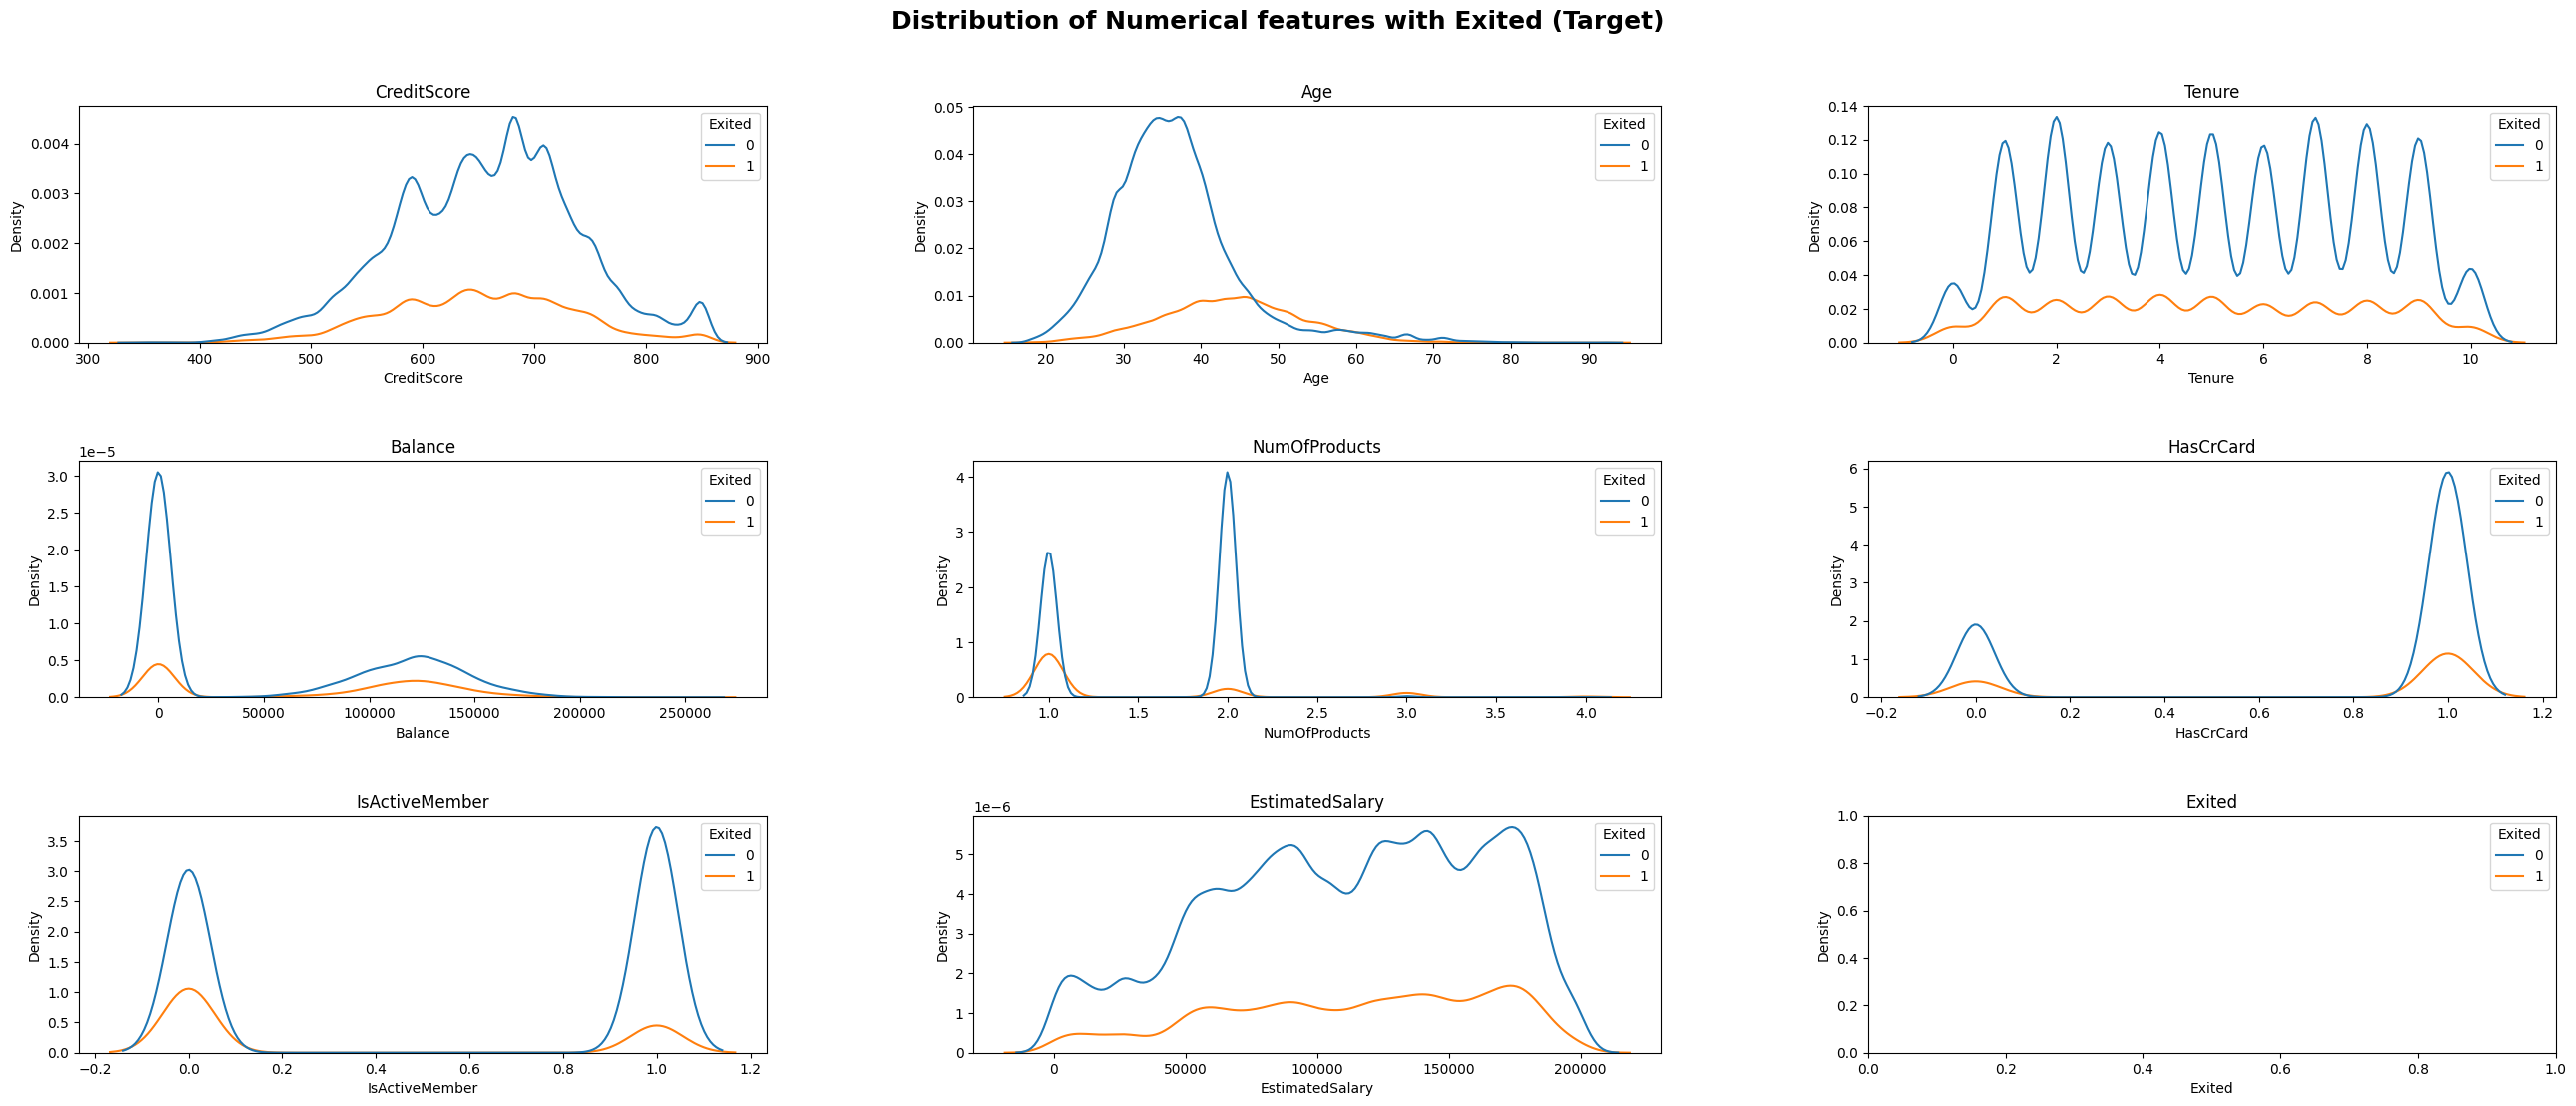

In [22]:
fig= plt.figure(figsize=[32, 12])
fig.suptitle('Distribution of Numerical features with Exited (Target)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i ,lab in enumerate(num_col):

    ax = fig.add_subplot(3, 3, i+1)
    sns.kdeplot(data=train_df[num_col], x=lab,hue='Exited',ax=ax,warn_singular=False)
    
    ax.set_title(f'{lab}')
plt.show()

Age: Customers who exited are older (on an Avg with 43.96) compared to non-exited customers (avg: 36.56).  
Balance: Customers who exited tend to have a higher average balance of ~71K compared to non-exited customers (mean balance: 51K).  
NumOfProducts: Customers with fewer products are more likely to churn.  
IsActiveMember: Non-exited customers are more likely to be active members compared to exited customers  

let's plot the importance of the features of the model  
we will use 2 different classifiers to check which features they consider equally important

small preprocessing

In [23]:
train_df['Geography'].value_counts()

France     99227
Spain      38689
Germany    37116
Name: Geography, dtype: int64

In [24]:
geo=pd.get_dummies(train_df["Geography"])
gen=pd.get_dummies(train_df['Gender'])


In [25]:

# Concatenate the Data Frames
train_df=pd.concat([train_df,geo,gen],axis=1)

geo=pd.get_dummies(test_dataset["Geography"])
gen=pd.get_dummies(test_dataset['Gender'])

test_dataset=pd.concat([test_dataset,geo,gen],axis =1)
# Drop Unnecessary columns
train_df=train_df.drop(['Geography','Gender'],axis=1)
test_dataset=test_dataset.drop(['Geography','Gender'],axis=1)

In [26]:
test_dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1


In [27]:
X=train_df.drop(['Exited'],axis=1)
y=train_df.Exited

let's consider the importance of features based on two classifiers

In [28]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier

# scale=StandardScaler()
# X_fit=scale.fit_transform(X)
# # for RFc
# best_forest = RandomForestClassifier(
#     n_estimators=50,
#     min_samples_split=2,
#     min_samples_leaf=11,
#     max_depth=15,
#     random_state=27,
# )
# #best_forest.fit(X_fit, y)
# #importance_f = best_forest.feature_importances_

# # for CBc
# best_catboost=CatBoostClassifier(
#     iterations=5000,
#     learning_rate=0.0001
# )
# #best_catboost.fit(X_fit,y)
# #importance_c=best_catboost.get_feature_importance()

# d={
#     'CatBoostClassifier':importance_c,
#     'RandomForestClassifier': importance_f*100
# }

# #feature_importance=pd.DataFrame(data=d,index=X.columns).sort_values(ascending=True,by=['RandomForestClassifier','CatBoostClassifier'])   
# #feature_importance.plot(kind='barh', figsize=(12, 8), color=['blue','orange']); 

According to the kdeplot graph and the importance of features graph, it can be concluded that age strongly affects the target variable. let's create 2 more columns where the distribution will be by age from 30 to 40 and from 40 to 50

In [29]:
def substitution_age_function(data,column,min,max):
    # we get exceptions
    series=data[column].where((data[column]<=max)&(data[column]>=min),0)
    # we select the target variable
    series=series.where(series==0,1)
    return series

# for train data
mid_30=0
mid_30=substitution_age_function(train_df,'Age',30,40)
mid_30.name='mid30'
mid_30.astype('int32')

mid_40=0
mid_40=substitution_age_function(train_df,'Age',41,50)
mid_40.name='mid40'
mid_40.astype('int32')

train_df=pd.concat([train_df,mid_30,mid_40],axis=1)

In [30]:
# for test data
mid_30=0
mid_30=substitution_age_function(test_dataset,'Age',30,40)
mid_30.name='mid30'
mid_30.astype('int32')

mid_40=0
mid_40=substitution_age_function(test_dataset,'Age',41,50)
mid_40.name='mid40'
mid_40.astype('int32')

test_dataset=pd.concat([test_dataset,mid_30,mid_40],axis=1)

It can be seen that with the help of feature_importance, we have determined which of the features have the greatest impact on the target variable.
it is worth noting that when using 2 different algorithms, there is a noticeable difference

make matrix correlation

In [31]:
correlation = train_df.drop(train_df['Exited']).corr()
correlation.style.background_gradient(cmap='coolwarm')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,mid30,mid40
CreditScore,1.000000,-0.008889,0.000930,0.005603,0.011597,-0.002601,0.015349,-0.000812,-0.027227,-0.005321,0.002796,0.003600,-0.002107,0.002107,0.008605,-0.008801
Age,-0.008889,1.000000,-0.010787,0.063260,-0.097279,-0.012601,0.008959,-0.006675,0.336607,-0.065178,0.090276,-0.011100,0.060845,-0.060845,-0.350413,0.377720
Tenure,0.000930,-0.010787,1.000000,-0.009658,0.007702,0.006405,-0.006844,0.001454,-0.019250,0.002640,-0.007342,0.004080,-0.009114,0.009114,0.009643,-0.006558
Balance,0.005603,0.063260,-0.009658,1.000000,-0.357269,-0.020285,-0.014145,0.004391,0.128395,-0.328349,0.530899,-0.130895,0.013813,-0.013813,-0.055118,0.047729
NumOfProducts,0.011597,-0.097279,0.007702,-0.357269,1.000000,0.005600,0.037840,-0.002417,-0.204486,0.059583,-0.097289,0.024689,-0.023250,0.023250,0.066397,-0.064168
HasCrCard,-0.002601,-0.012601,0.006405,-0.020285,0.005600,1.000000,-0.020682,0.004931,-0.021126,0.015845,-0.004594,-0.014395,-0.006597,0.006597,0.015386,-0.009675
IsActiveMember,0.015349,0.008959,-0.006844,-0.014145,0.037840,-0.020682,1.000000,-0.008687,-0.207223,0.016749,-0.035254,0.014729,-0.033015,0.033015,0.019324,-0.065070
EstimatedSalary,-0.000812,-0.006675,0.001454,0.004391,-0.002417,0.004931,-0.008687,1.000000,0.018601,-0.000296,0.011718,-0.011191,0.007264,-0.007264,-0.002947,0.010815
Exited,-0.027227,0.336607,-0.019250,0.128395,-0.204486,-0.021126,-0.207223,0.018601,1.000000,-0.129129,0.208625,-0.051319,0.144105,-0.144105,-0.246220,0.230156
France,-0.005321,-0.065178,0.002640,-0.328349,0.059583,0.015845,0.016749,-0.000296,-0.129129,1.000000,-0.593529,-0.609451,-0.025308,0.025308,0.051890,-0.052234


the graph shows that only 2 signs strongly correlate with each other: 'Balance' and 'Germany'

## write learning model


scale datasets

In [32]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

X=train_df.drop(['Exited'],axis=1)
y=train_df.Exited
X_sc=scale.fit_transform(X)
X_test=scale.transform(test_dataset)

In [33]:
test_dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,mid30,mid40
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0,0.0,0.0
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0,0.0,1.0
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0,1.0,0.0
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1,1.0,0.0
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1,0.0,0.0
110019,575,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,1,0,1.0,0.0
110020,712,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,1,1.0,0.0
110021,709,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,1,0,1.0,0.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x_train,x_val,y_train,y_val= train_test_split(X_sc,y,test_size=0.2,random_state=55)

## LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

LogReg=LogisticRegression(random_state=45)
parametrs={
    'penalty':('elasticnet','l1','l2'),
    'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
    'max_iter':range(10,1000,10)
}

random_search_LR=RandomizedSearchCV(estimator=LogReg,
                                param_distributions=parametrs,
                                n_iter=15,
                                n_jobs=2,
                                cv=5)

random_search_LR.fit(x_train, y_train)
print(f'{random_search_LR.best_params_,random_search_LR.score(x_train, y_train)}\n')
y_pred_LR=random_search_LR.predict_proba(x_val)
roc_LR=roc_auc_score(y_val,y_pred_LR[:, 1])
print (roc_LR)

({'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 900}, 0.8356579182288877)

0.8189647460479993


In [75]:
# save as numpy array
train_lr=random_search_LR.predict_proba(X_sc)[:,-1]
np.save('lr_m',train_lr)

## XGBoost

In [51]:
from xgboost import XGBClassifier

xgb=XGBClassifier(
    objective="binary:logistic",
    tree_method="gpu_hist"  # благодаря этому задействуется GPU.
)

parametrs={
    'learning_rate': np.linspace(0.0001,0.001,10),
    'n_estimators':range(100,1000,50),
    'max_depth':range(3,10,1)
}

random_search_xgb=RandomizedSearchCV(estimator=xgb,
                                param_distributions=parametrs,
                                n_iter=15,
                                n_jobs=2,
                                cv=7
                                )

random_search_xgb.fit(x_train, y_train)
print(f'{random_search_xgb.best_params_,random_search_xgb.score(x_train, y_train)}\n')

#y_pred_XGB=random_search_xgb.predict(x_val)

roc_XGB=roc_auc_score(y_val,random_search_xgb.predict_proba(x_val)[:,-1])
print (roc_XGB)

({'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.001}, 0.8654168898410998)

0.8840687013676485


In [76]:
# save as numpy array
train_xgb=random_search_xgb.predict_proba(X_sc)[:,-1]
np.save('xgb_m',train_xgb)

## CatBoostClassifier

In [53]:
from catboost import CatBoostClassifier

catboost=CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    task_type="GPU"
)

parametrs={
    'learning_rate': np.linspace(0.0001,0.001,10),
    'max_depth':range(3,10,1),
    'iterations':range(100,1000,50),
}

random_search_cat=RandomizedSearchCV(
    estimator=catboost,
    param_distributions=parametrs,
    n_iter=15,
    n_jobs=2,
    cv=7,
)

random_search_cat.fit(x_train, y_train)
print(f'{random_search_cat.best_params_,random_search_cat.score(x_train, y_train)}\n')

roc_cat=roc_auc_score(y_val,random_search_cat.predict_proba(x_val)[:,-1])
print (roc_cat)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 21.6ms	remaining: 7.54s
1:	total: 35ms	remaining: 6.1s
2:	total: 48.8ms	remaining: 5.64s
3:	total: 62.7ms	remaining: 5.43s
4:	total: 77.1ms	remaining: 5.32s
5:	total: 91.7ms	remaining: 5.26s
6:	total: 104ms	remaining: 5.08s
7:	total: 118ms	remaining: 5.04s
8:	total: 131ms	remaining: 4.97s
9:	total: 146ms	remaining: 4.95s
10:	total: 160ms	remaining: 4.93s
11:	total: 173ms	remaining: 4.88s
12:	total: 188ms	remaining: 4.86s
13:	total: 203ms	remaining: 4.87s
14:	total: 217ms	remaining: 4.85s
15:	total: 232ms	remaining: 4.84s
16:	total: 247ms	remaining: 4.84s
17:	total: 261ms	remaining: 4.82s
18:	total: 275ms	remaining: 4.79s
19:	total: 289ms	remaining: 4.76s
20:	total: 304ms	remaining: 4.76s
21:	total: 318ms	remaining: 4.73s
22:	total: 331ms	remaining: 4.71s
23:	total: 345ms	remaining: 4.68s
24:	total: 359ms	remaining: 4.66s
25:	total: 372ms	remaining: 4.64s
26:	total: 386ms	remaining: 4.61s
27:	total: 399ms	remaining: 4.59s
28:	total: 414ms	remaining: 4.58s
29:	total: 428ms	rema

In [77]:
train_cat=random_search_cat.predict_proba(X_sc)[:,-1]
np.save('cat_m',train_cat)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(random_state=27)

parameters = {
    'n_estimators': range(50, 1000, 25),
    'max_depth': range(2,15, 2),
    'min_samples_leaf': range(1, 101, 10),
    'min_samples_split': range(2, 101, 10)
      }

random_search_FC = RandomizedSearchCV(estimator=random_f, param_distributions=parameters, n_iter=10, n_jobs=-1, cv=5, verbose=4)
random_search_FC.fit(x_train, y_train)
print(random_search_FC.best_params_)

roc_XGB=roc_auc_score(y_val,random_search_FC.predict_proba(x_val)[:,-1])
print (roc_XGB)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 350, 'min_samples_split': 52, 'min_samples_leaf': 11, 'max_depth': 14}
0.884273583941559


In [78]:
train_fr=random_search_FC.predict_proba(X_sc)[:,-1]
np.save('forest_m',train_fr)

In [86]:
# generate predictoin for test dataset and save as numpy
test_lr=random_search_LR.predict_proba(X_test)[:,-1]
np.save('lr_test',test_lr)
test_fr=random_search_FC.predict_proba(X_test)[:,-1]
np.save('forest_test',test_fr)
test_xgb=random_search_xgb.predict_proba(X_test)[:,-1]
np.save('xgb_test',test_xgb)
test_cat=random_search_cat.predict_proba(X_test)[:,-1]
np.save('cat_test',test_cat)

## Stacing model

In [39]:
from catboost import CatBoostClassifier
base_models = [
   ('logreg', LogisticRegression(
      solver='liblinear',
      penalty='l2',
      max_iter=980,
      random_state=45,)),

   ('catboost',CatBoostClassifier(
      iterations= 800,
      max_depth= 9 ,  
      learning_rate=0.001)),

   ('randon_f',RandomForestClassifier(
      n_estimators=650,
      min_samples_leaf=1,
      min_samples_split=32,
      max_depth=16
   ))       
        ]

meta_model=XGBClassifier(
      n_estimators= 850,
      max_depth= 7 ,  
      learning_rate=0.0008
      )


In [40]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X, y)

0:	learn: 0.6920990	total: 170ms	remaining: 2m 16s
1:	learn: 0.6910483	total: 189ms	remaining: 1m 15s
2:	learn: 0.6900000	total: 209ms	remaining: 55.6s
3:	learn: 0.6890634	total: 223ms	remaining: 44.3s
4:	learn: 0.6880191	total: 242ms	remaining: 38.5s
5:	learn: 0.6870125	total: 261ms	remaining: 34.6s
6:	learn: 0.6859758	total: 280ms	remaining: 31.7s
7:	learn: 0.6849541	total: 299ms	remaining: 29.6s
8:	learn: 0.6839298	total: 317ms	remaining: 27.9s
9:	learn: 0.6829362	total: 337ms	remaining: 26.6s
10:	learn: 0.6819114	total: 357ms	remaining: 25.6s
11:	learn: 0.6808993	total: 376ms	remaining: 24.7s
12:	learn: 0.6799102	total: 396ms	remaining: 24s
13:	learn: 0.6789064	total: 419ms	remaining: 23.5s
14:	learn: 0.6780434	total: 429ms	remaining: 22.5s
15:	learn: 0.6770473	total: 453ms	remaining: 22.2s
16:	learn: 0.6760527	total: 473ms	remaining: 21.8s
17:	learn: 0.6750692	total: 493ms	remaining: 21.4s
18:	learn: 0.6740888	total: 512ms	remaining: 21s
19:	learn: 0.6730930	total: 532ms	remaining

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(max_iter=980,
                                                   random_state=45,
                                                   solver='liblinear')),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x0000022B03EAB1C0>),
                               ('randon_f',
                                RandomForestClassifier(max_depth=16,
                                                       min_samples_split=32,
                                                       n_estimators=650))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 col...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.0008,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=850, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [43]:
y_pred_proba_val = stacking_model.predict_proba(x_val)

roc_auc_val = roc_auc_score(y_val, y_pred_proba_val[:, 1])
print(f"Validation ROC AUC Score: {roc_auc_val:.8f}")

Validation ROC AUC Score: 0.71837338


## try neural network with pytorch

In [35]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
from tqdm import tqdm

In [36]:
# Convert to PyTorch tensors
def convert_to_tensors(X, y):
    return torch.tensor(X.astype(np.float32)), torch.tensor(y.astype(np.float32)).unsqueeze(1)

In [37]:
# stack data from calaasifier and train dataset
xgb_pr = np.load('xgb_m.npy')
cat_pr = np.load('cat_m.npy')
lr_pr= np.load('lr_m.npy')
fr_pr= np.load('forest_m.npy')
# for test
xgb_ts = np.load('xgb_test.npy')
cat_ts = np.load('cat_test.npy')
lr_ts= np.load('lr_test.npy')
fr_ts= np.load('forest_test.npy')

In [38]:
# prepare array 
X_train_extended = np.hstack((X_sc, xgb_pr.reshape(-1, 1),cat_pr.reshape(-1, 1),lr_pr.reshape(-1,1),fr_pr.reshape(-1,1)))
X_test_extended = np.hstack((X_test, xgb_ts.reshape(-1, 1), cat_ts.reshape(-1, 1),lr_ts.reshape(-1, 1),fr_ts.reshape(-1, 1)))

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_extended, y.to_numpy(), test_size=0.20, random_state=42)

# Convert to PyTorch tensors
X_train_torch, y_train_torch = convert_to_tensors(X_train, y_train)
X_val_torch, y_val_torch = convert_to_tensors(X_val, y_val)

# DataLoader
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_torch, y_val_torch), batch_size=64, shuffle=False)

In [39]:
class simple_nn(nn.Module):
    def __init__ (self,input_size):
        super(simple_nn,self).__init__()

        self.seq1=nn.Sequential(
            nn.Linear(in_features=input_size,out_features=128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
        )
        self.seq2=nn.Sequential(
            nn.Linear(in_features=128,out_features=64),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.seq3=nn.Sequential(
            nn.Linear(in_features=64,out_features=64),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.seq4=nn.Sequential(
            nn.Linear(in_features=64,out_features=64),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.out=nn.Sequential(
            nn.Linear(in_features=64,out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x=self.seq1(x)
        x=self.seq2(x)
        x=self.seq3(x)
        x=self.seq4(x)
        x=self.out(x)
        return x



In [40]:
X_train.shape[1]

19

In [41]:
device='cuda' if torch.cuda.is_available() else 'cpu'
model=simple_nn(input_size=X_train.shape[1]).to(device)
summary(model.cuda(),)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       2,560
|    └─BatchNorm1d: 2-2                  256
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-4                       8,256
|    └─BatchNorm1d: 2-5                  128
|    └─ReLU: 2-6                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-7                       4,160
|    └─BatchNorm1d: 2-8                  128
|    └─ReLU: 2-9                         --
├─Sequential: 1-4                        --
|    └─Linear: 2-10                      4,160
|    └─BatchNorm1d: 2-11                 128
|    └─ReLU: 2-12                        --
├─Sequential: 1-5                        --
|    └─Linear: 2-13                      65
|    └─Sigmoid: 2-14                     --
Total params: 19,841
Trainable params: 19,841
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       2,560
|    └─BatchNorm1d: 2-2                  256
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-4                       8,256
|    └─BatchNorm1d: 2-5                  128
|    └─ReLU: 2-6                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-7                       4,160
|    └─BatchNorm1d: 2-8                  128
|    └─ReLU: 2-9                         --
├─Sequential: 1-4                        --
|    └─Linear: 2-10                      4,160
|    └─BatchNorm1d: 2-11                 128
|    └─ReLU: 2-12                        --
├─Sequential: 1-5                        --
|    └─Linear: 2-13                      65
|    └─Sigmoid: 2-14                     --
Total params: 19,841
Trainable params: 19,841
Non-trainable params: 0

In [42]:
# criteria for evaluating learning
criterion =nn.BCELoss()
# optimizer for updating weights
optimizer=torch.optim.Adam(model.parameters(), lr=3*(10**(-3)),)
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [43]:
def accuracy_fn(y_true, y_pred):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_true.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    roc_auc = auc(fpr, tpr)
    return roc_auc * 100

In [44]:
def fit_epoch(model, train_set,optimizer,sheduler,criteria):

    model.train()

    acc=[]
    tr_loss=0
    #correct=0
    processed_data=0

    for x_batch,y_batch in train_set:
        
        x_batch=x_batch.to(device)
        y_batch=y_batch.to(device)

        optimizer.zero_grad()
        outp=model(x_batch)
        loss=criteria(outp,y_batch)
        loss.backward()
        optimizer.step()

        # predicted data
        pred=torch.argmax(outp,1)
        # counting losses on ONE batch
        tr_loss += loss.item()* x_batch.size(0)
        # let's see which of the predicted values coincide with the true ones
        #correct+= torch.sum(pred == y_batch.data)
        # we are counting how much data has already been processed 
        # gradually we summarize each of the batches
        processed_data += x_batch.size(0)
        # use probabilities for auc
        acc.append(accuracy_fn(y_batch.squeeze(),outp.squeeze()))


    tr_loss = tr_loss /processed_data
    tr_acc=(sum(acc))/(len(acc)) # average auc about epoch
    print(f"Training Loss: {tr_loss:.4f}, Training Accuracy: {tr_acc:.4f}")

    sheduler.step()
    
    return tr_loss,tr_acc

In [45]:
def eval_epoch(model,val_set, device, criteria):
    model.eval()

    acc=[]
    val_loss=0

    processed_data=0

    for x_batch,y_batch in val_set:

        x_batch,y_batch=x_batch.to(device),y_batch.to(device)

        with torch.no_grad():
            outp=model(x_batch)
            loss=criteria(outp,y_batch)
            pred=torch.argmax(outp.data,1)
    
        val_loss+=loss.item()*x_batch.size(0)
        processed_data+=x_batch.size(0)

        acc.append(accuracy_fn(y_batch.squeeze(),outp.squeeze()))
    

    #print (outp)
    val_loss=val_loss/processed_data
    val_acc=sum(acc)/len(acc)

    print(f"Validation Loss: {val_loss:.4f}, ValidationAccuracy: {val_acc:.4f}")
    return val_loss,val_acc

In [46]:
def train (train_set,val_set,model,optimizer,criterion,epochs):
    best_val_loss=float('inf')
    best_model_state = None
    history=[]
    model=model.to(device)

    with tqdm(total=epochs) as pbar_outer:

        for epoch in range(epochs):
            
            train_loss,train_acc=fit_epoch(model,train_set,optimizer,scheduler,criterion)
            val_loss, val_acc = eval_epoch(model, val_set,device, criterion)

            history.append((train_loss,val_loss, val_acc))
            
            pbar_outer.update(1)

            if val_loss<best_val_loss:
                best_val_loss=val_loss
                best_model_state = model.state_dict()
                torch.save(model.state_dict(),'bestmodel.pt')

    return history

In [47]:
def prepare_submission(model_state, test_data_extended, test_ids, filename='submission.csv'):
    '''Predictions and Submission'''
    model.load_state_dict(model_state)
    X_test_torch = torch.tensor(test_data_extended.astype(np.float32))
    predictions = model(X_test_torch.to(device))#.detach().numpy().squeeze()
    predictions=predictions.cpu().detach().numpy().squeeze()
    submission_df = pd.DataFrame({
        'id': test_ids,
        'Exited': predictions
    })
    submission_df.to_csv(f'E:\mphti\\training\pl_gr\{filename}', index=False)
    print(f"Predictions saved to {filename}")

In [49]:
# let's check if everything is written correctly
fit_epoch(model,train_loader,optimizer,scheduler,criterion)
eval_epoch(model,val_loader,device,criterion)

Training Loss: 0.2909, Training Accuracy: 91.5406


(0.29091411984875637, 91.54062274135853)

In [48]:
# let's train the model
history=train(train_set=train_loader,
              val_set=val_loader,
              model=model,
              optimizer=optimizer,
              criterion=criterion,
              epochs=35
              )

  0%|          | 0/35 [00:00<?, ?it/s]

Training Loss: 0.3177, Training Accuracy: 89.4937


  3%|▎         | 1/35 [00:07<04:21,  7.68s/it]

Validation Loss: 0.2985, ValidationAccuracy: 90.9530
Training Loss: 0.2912, Training Accuracy: 91.4496


  6%|▌         | 2/35 [00:14<04:05,  7.43s/it]

Validation Loss: 0.2827, ValidationAccuracy: 91.7813
Training Loss: 0.2837, Training Accuracy: 91.9518


  9%|▊         | 3/35 [00:22<04:01,  7.55s/it]

Validation Loss: 0.2815, ValidationAccuracy: 91.8490
Training Loss: 0.2794, Training Accuracy: 92.2044


 11%|█▏        | 4/35 [00:30<03:54,  7.58s/it]

Validation Loss: 0.2744, ValidationAccuracy: 92.3564
Training Loss: 0.2678, Training Accuracy: 92.9004


 14%|█▍        | 5/35 [00:38<03:50,  7.68s/it]

Validation Loss: 0.2638, ValidationAccuracy: 93.0647
Training Loss: 0.2652, Training Accuracy: 92.9843


 17%|█▋        | 6/35 [00:45<03:42,  7.67s/it]

Validation Loss: 0.2638, ValidationAccuracy: 93.0362
Training Loss: 0.2642, Training Accuracy: 93.0680


 20%|██        | 7/35 [00:53<03:36,  7.72s/it]

Validation Loss: 0.2614, ValidationAccuracy: 93.1950
Training Loss: 0.2630, Training Accuracy: 93.1378


 23%|██▎       | 8/35 [01:01<03:29,  7.75s/it]

Validation Loss: 0.2609, ValidationAccuracy: 93.1945
Training Loss: 0.2611, Training Accuracy: 93.2373


 26%|██▌       | 9/35 [01:09<03:22,  7.78s/it]

Validation Loss: 0.2602, ValidationAccuracy: 93.2474
Training Loss: 0.2611, Training Accuracy: 93.2184


 29%|██▊       | 10/35 [01:17<03:16,  7.85s/it]

Validation Loss: 0.2605, ValidationAccuracy: 93.2778
Training Loss: 0.2607, Training Accuracy: 93.2036


 31%|███▏      | 11/35 [01:25<03:08,  7.85s/it]

Validation Loss: 0.2602, ValidationAccuracy: 93.2722
Training Loss: 0.2613, Training Accuracy: 93.2558


 34%|███▍      | 12/35 [01:33<03:02,  7.92s/it]

Validation Loss: 0.2597, ValidationAccuracy: 93.2903
Training Loss: 0.2611, Training Accuracy: 93.2429


 37%|███▋      | 13/35 [01:41<02:54,  7.92s/it]

Validation Loss: 0.2609, ValidationAccuracy: 93.2704
Training Loss: 0.2608, Training Accuracy: 93.2552


 40%|████      | 14/35 [01:49<02:46,  7.93s/it]

Validation Loss: 0.2601, ValidationAccuracy: 93.2765
Training Loss: 0.2606, Training Accuracy: 93.2549


 43%|████▎     | 15/35 [01:56<02:36,  7.83s/it]

Validation Loss: 0.2599, ValidationAccuracy: 93.2856
Training Loss: 0.2610, Training Accuracy: 93.2477


 46%|████▌     | 16/35 [02:04<02:30,  7.94s/it]

Validation Loss: 0.2598, ValidationAccuracy: 93.2865
Training Loss: 0.2609, Training Accuracy: 93.2304


 49%|████▊     | 17/35 [02:13<02:24,  8.04s/it]

Validation Loss: 0.2598, ValidationAccuracy: 93.2848
Training Loss: 0.2606, Training Accuracy: 93.2400


 51%|█████▏    | 18/35 [02:20<02:14,  7.91s/it]

Validation Loss: 0.2602, ValidationAccuracy: 93.2926
Training Loss: 0.2604, Training Accuracy: 93.2787


 54%|█████▍    | 19/35 [02:28<02:07,  7.99s/it]

Validation Loss: 0.2597, ValidationAccuracy: 93.2933
Training Loss: 0.2609, Training Accuracy: 93.2622


 57%|█████▋    | 20/35 [02:36<01:58,  7.88s/it]

Validation Loss: 0.2595, ValidationAccuracy: 93.2859
Training Loss: 0.2610, Training Accuracy: 93.2389


 60%|██████    | 21/35 [02:44<01:50,  7.89s/it]

Validation Loss: 0.2594, ValidationAccuracy: 93.2865
Training Loss: 0.2608, Training Accuracy: 93.2982


 63%|██████▎   | 22/35 [02:52<01:42,  7.89s/it]

Validation Loss: 0.2599, ValidationAccuracy: 93.2892
Training Loss: 0.2610, Training Accuracy: 93.2304


 66%|██████▌   | 23/35 [03:00<01:35,  7.97s/it]

Validation Loss: 0.2596, ValidationAccuracy: 93.2956
Training Loss: 0.2600, Training Accuracy: 93.3042


 69%|██████▊   | 24/35 [03:08<01:28,  8.02s/it]

Validation Loss: 0.2597, ValidationAccuracy: 93.2692
Training Loss: 0.2604, Training Accuracy: 93.2445


 71%|███████▏  | 25/35 [03:16<01:20,  8.07s/it]

Validation Loss: 0.2598, ValidationAccuracy: 93.2809
Training Loss: 0.2607, Training Accuracy: 93.2263


 74%|███████▍  | 26/35 [03:24<01:11,  7.97s/it]

Validation Loss: 0.2599, ValidationAccuracy: 93.2878
Training Loss: 0.2605, Training Accuracy: 93.3067


 77%|███████▋  | 27/35 [03:32<01:03,  7.98s/it]

Validation Loss: 0.2609, ValidationAccuracy: 93.2475
Training Loss: 0.2611, Training Accuracy: 93.1983


 80%|████████  | 28/35 [03:40<00:56,  8.01s/it]

Validation Loss: 0.2596, ValidationAccuracy: 93.2863
Training Loss: 0.2602, Training Accuracy: 93.3335


 83%|████████▎ | 29/35 [03:48<00:48,  8.08s/it]

Validation Loss: 0.2593, ValidationAccuracy: 93.2804
Training Loss: 0.2599, Training Accuracy: 93.2901


 86%|████████▌ | 30/35 [03:57<00:40,  8.11s/it]

Validation Loss: 0.2606, ValidationAccuracy: 93.2655
Training Loss: 0.2604, Training Accuracy: 93.3358


 89%|████████▊ | 31/35 [04:05<00:32,  8.23s/it]

Validation Loss: 0.2599, ValidationAccuracy: 93.2867
Training Loss: 0.2610, Training Accuracy: 93.2538


 91%|█████████▏| 32/35 [04:15<00:26,  8.70s/it]

Validation Loss: 0.2599, ValidationAccuracy: 93.2944
Training Loss: 0.2607, Training Accuracy: 93.2513
Validation Loss: 0.2599, ValidationAccuracy: 93.2979
Training Loss: 0.2604, Training Accuracy: 93.2249


 97%|█████████▋| 34/35 [04:24<00:06,  6.85s/it]

Validation Loss: 0.2597, ValidationAccuracy: 93.2955
Training Loss: 0.2609, Training Accuracy: 93.2063


100%|██████████| 35/35 [04:34<00:00,  7.84s/it]

Validation Loss: 0.2600, ValidationAccuracy: 93.2713


In [70]:
acc=[history[i][2] for i in range(0,len(history)) ]
import statistics 
print (f"Mean accuracy {statistics.mean(acc)}")

Mean accuracy 93.08651149915866


In [71]:
# let's upload the model we trained
loaded_model=torch.load(r'E:\mphti\training\bestmodel.pt', map_location="cuda")

submit

In [72]:
prepare_submission(loaded_model, X_test_extended,test_id)

Predictions saved to submission.csv


---

useful links

https://habr.com/ru/companies/otus/articles/573924/  
https://blog.csdn.net/NockinOnHeavensDoor/article/details/83384844  
https://www.analyseup.com/python-machine-learning/xgboost-parameter-tuning.html